# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση. 
## Σύστημα συστάσεων βασισμένο στο περιεχόμενο
## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 


#Στοιχεία ομάδας 19

1.   Δαμιανός Παππάς, ΑΜ: 03116608
2.   Χαράλαμπος Ρωσσίδης, ΑΜ: 03116701
3.   Νεκτάριος Ματσάγκος, ΑΜ: 03116709

In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib
!pip install --upgrade PyStemmer

     |████████████████████████████████| 1.5MB 8.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 1.4 MB 9.8 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434674 sha256=f18137c508557ddc5fd466d59cd39eafeb2bc4d68ea1f4f846aa95ef5233c05c
  Stored in directory: /root/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 22.2 MB 6.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 559 kB 8.9 MB/s 
  Created wheel for PyStemmer: filename=Py

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με περίπου 40.000 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

Κάθε ομάδα θα δουλέψει σε ένα μοναδικό υποσύνολο 5.000 ταινιών (διαφορετικό dataset για κάθε ομάδα) ως εξής

1. Κάθε ομάδα έχει έναν αριθμό "seed" (φύτρο) που είναι ο ίδιος με τον αριθμό της ομάδας σας: θα τον βρείτε στην κολόνα Α/Α [εδώ](https://docs.google.com/spreadsheets/d/1CD6AtX7YnocXceCELl_XJ06kyRr0YQPhor8dpw012t0/edit?usp=sharing).

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Στο επόμενο κελί αλλάξτε τη μεταβλητή `team_seed_number` με το Seed της ομάδας σας.

4. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.

In [ ]:
import numpy as np

# βάλτε το seed που αντιστοιχεί στην ομάδα σας
team_seed_number = 19

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=99` (την εκατοστή) θα γράψουμε `print(corpus[99])`.

In [ ]:
ID = 99
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

["Confessions d'un Barjo"]
['"Drama",  "Comedy of manners",  "Comedy-drama",  "Domestic Comedy"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο
<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 

## Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
corpus_tf_idf = vectorizer.transform(corpus)

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης. Ανατρέξτε στα notebooks του εργαστηρίου και στο [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing) των ασκήσεων.

In [ ]:
print(corpus_tf_idf.shape)

(5000, 48888)


## Προσθήκη stop words που βρέθηκαν εμπειρικά οτι βελτιώνουν τις συστάσεις

Προστέθηκαν ονόματα και συχνές λέξεις στην περιγραφή ταινιών (πχ plot,story,film) που δεν προσθέτουν αξία στο περιεχόμενο της περιγραφής:

In [ ]:
import nltk, string, Stemmer, textwrap
nltk.download('stopwords')
nltk.download('punkt') #χρειαζόμαστε το tokenizer
from nltk.corpus import stopwords # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Υλοποίηση του συστήματος συστάσεων

Το σύστημα συστάσεων που θα παραδώσετε θα είναι μια συνάρτηση `content_recommender` με δύο ορίσματα `target_movie` και `max_recommendations`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, από το `corpus_tf_idf` υπολογίστε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), id, τίτλο, σύνοψη, κατηγορίες (categories)

In [ ]:
#Δημιουργία της συνάρτησης content_recommender
from sklearn.metrics.pairwise import cosine_similarity

def content_recommender(target_movie, max_recommendations):
  total = max_recommendations
  # Calculate similary between all pairs of elements and then sort in descending order
  similarity = cosine_similarity(corpus_tf_idf, corpus_tf_idf)
  indices = np.argsort(similarity, axis=1)[:, ::-1]
  print("ID:", target_movie, "\nTitle:", titles[target_movie],
        "\nSummary:", textwrap.fill(str(summaries[target_movie]),100),
        "\nCategory:", categories[target_movie])
  
  # For 'max_recommendations' movies print relevant information based on their similarity
  # The position of a movie in the indices array 'i' is its recommendation order
  print("\n---Recommendations---")
  for i in range(1, max_recommendations + 1):
    r_id = indices[target_movie][i]
    if total==6:
      print("Recommendation order:", i, "\nID:", r_id, "\nTitle:", titles[r_id],"\nSummary:", textwrap.fill(str(summaries[r_id]),100),
          
          "\nCategory:", categories[r_id], "\nSimilarity:",similarity[target_movie,r_id], "\n")
    else:
      print("Recommendation order:", i, "\nID:", r_id, "\nTitle:", titles[r_id],
          
          "\nCategory:", categories[r_id], "\nSimilarity:",similarity[target_movie,r_id], "\n")
  


## Βελτιστοποίηση

Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε τη για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. Μπορείτε επίσης να βελτιστοποιήσετε τη συνάρτηση παρατηρώντας πολλά φαινόμενα που το σύστημα εκλαμβάνει ως ομοιότητα περιεχομένου ενώ επί της ουσίας δεν είναι επιθυμητό να συνυπολογίζονται (δείτε σχετικά το [FAQ](https://docs.google.com/document/d/1hou1gWXQuHAB7J2aV44xm_CtAWJ63q6Cu1V6OwyL_n0/edit?usp=sharing)). Ταυτόχρονα, μια άλλη κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 

## Stemming & TF-IDF

Προχωρούμε σε περαιτέρω επεξεργασία του corpus μας εστιάζοντας στο stem των λέξεων και αγνοώντας σχετικά λήμματα, προς αύξηση της αποδοτικότητας. Στη συνέχεια κάνουμε τη ζητούμενη μετατροπή σε tf-idf:

In [ ]:
import joblib
import Stemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά


english_stemmer = Stemmer.Stemmer('en')
class StemmedTfidfVectorizer(TfidfVectorizer):
  def build_analyzer(self):
    analyzer = super(TfidfVectorizer, self).build_analyzer()
    return lambda doc: english_stemmer.stemWords(analyzer(doc))

#λεξεις που δεν έχουν σημασιολογικό περιεχόμενο
my_words=['film','director','plot','movie','scenes','title','actor','writer','man','woman','human','night','is','day','girl','boy','about','was', "'d", "'ll", "'m", "'re", "'the", "'ve",'hero', '–', '—', '‘', '’']
not_useful_words = list(list(string.punctuation) + my_words + stopwords.words('english'))
vectorizer = StemmedTfidfVectorizer(analyzer = 'word', stop_words = not_useful_words, max_df=0.6, min_df=0.02)
%time corpus_tf_idf = vectorizer.fit_transform(corpus).toarray()
joblib.dump(corpus_tf_idf, 'corpus_tf_idf.pkl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


CPU times: user 1.92 s, sys: 5.98 ms, total: 1.92 s
Wall time: 1.93 s


['corpus_tf_idf.pkl']

## Επεξήγηση επιλογών και ποιοτική ερμηνεία

Σε markdown περιγράψτε πώς προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. Επίσης σε markdown δώστε 10 παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (5 και παραπάνω) και σημειώστε συνοπτικά ποια είναι η θεματική που ενώνει τις ταινίες.

Δείτε [εδώ](https://pastebin.com/raw/ZEvg5t3z) ένα παράδειγμα εξόδου του βελτιστοποιημένου συστήματος συστάσεων για την ταίνία ["Q Planes"](https://en.wikipedia.org/wiki/Q_Planes) με την κλήση της συνάρτησης για κάποιο seed `content_recommender(529,3)`. Είναι φανερό ότι η κοινή θεματική των ταινιών είναι τα αεροπλάνα, οι πτήσεις, οι πιλότοι, ο πόλεμος.

In [ ]:
print(corpus_tf_idf.shape)

(5000, 1166)


In [ ]:
recommended_movies = content_recommender(10,6)

ID: 10 
Title: ['Shield for Murder'] 
Summary: ["Lieutenant Barney Nolan , a 16-year veteran of the police force, has had enough. In a secluded
alley late one night, he fatally shoots a bookmaker in the back and steals the $25,000 he was
carrying. He then claims the man was killed trying to escape custody. Sergeant Mark Brewster , his
friend and partner, believes him, as does the Captain of Detectives, Captain Gunnarson . However,
newspaper reporter Cabot  suspects otherwise. Packy Reed , the dead man's boss, sends private
investigators Fat Michaels  and Laddie O'Neil to tell Barney he wants to see him. Packy gives Barney
one chance to return the money, but Barney is uncooperative. Barney takes his girlfriend, Patty
Winters , to see a house for sale, then slips away to hide the money outside. When he asks Patty to
marry him, she accepts. Deaf-mute Ernst Sternmuller goes to the police station, but gives a note
explaining he witnessed the crime to Barney, not recognizing him. Barney goes

### Διαδικασία βελτιστοποίησης
Ακολουθήσαμε την πρόταση της εκφώνησης της εργασίας και ξεκινήσαμε την τροποποίηση των παραμέτρων του TfidfVectorizer αρχικά για 2 προτάσεις, και στην συνέχεια για 5 προτάσεις.
Αρχικά παρατηρήσαμε οτι η παράμετρος max_df του TfidfVectorizer δεν αφαιρούσε περισσότερα features για τιμές άνω του 0.4, και για τιμές χαμηλότερες απο αυτό μείωνε την ποιότητα των προτάσεων. Επίσης η παράμετρος ngram_range δοκιμάστηκε με τιμές (1,1)-only unigrams , (1,2)-unigrams and bigrams , (1,3)-unigrams bigrams and trigrams αλλα δεν επηρέασε θετικά τα αποτελέσματα οπότε αφέθηκε στην τιμη (1,1). Οπότε, η βελτιστοποίηση του TfidfVectorizer έγινε με την τροποποίηση της παραμέτρου min_df και την εισαγωγή stop words  με ταυτόχρονη παρατήρηση των προτάσεων που προκύπτουν. Τα 10 ζητούμενα παραδείγματα:

In [ ]:
best_similarity = [3613,1734,1223,2731,3230,209,4956,1876,694,10]
commons = ["Χωριό","Δράμα,καθημερινότητα","Ιστορικό περιεχόμενο","Ιστορικο και πολιτικο περιεχόμενο","Δράμα σε μικρές κοινωνίες","Πόλεμος","Αγάπη","Τρόμου","Σχολικές","Αστυνομικές"]
for i in range(10):
  print("------------------------------------------------------------------------------\n","Commons:",commons[i],"\n","------------------------------------------------------------------------------\n")
  content_recommender(best_similarity[i],5)
    

------------------------------------------------------------------------------
 Commons: Χωριό 
 ------------------------------------------------------------------------------

ID: 3613 
Title: ['Silver Stallion'] 
Summary: ['Soldiers with the U.N. forces that entered Korea during the Korean War rape a village girl named
Eon-rae. The villagers ostracize Eon-rae and her son. Unable to make a living, Eon-rae joins the
brothel district that has been set up near the U.N. base on the other side of the river from the
village. The war and the introduction of U.S. culture break down the social order of the village.
After several village children have died, the villagers put the blame on the prostitutes. Eventually
the villagers, unable to maintain the village, leave their homes one by one. Eon-rae and her son
also leave.Synopsis from '] 
Category: ['"Western",  "Drama",  "Adventure"']

---Recommendations---
Recommendation order: 1 
ID: 4269 
Title: ['Rekava'] 
Category: ['"Drama"'] 
Similarity

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM
<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

## Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους. 

Η `build_final_set` αρχικά μετατρέπει την αραιή αναπαράσταση tf-idf της εξόδου της `TfidfVectorizer()` σε πυκνή (η [αραιή αναπαράσταση](https://en.wikipedia.org/wiki/Sparse_matrix) έχει τιμές μόνο για τα μη μηδενικά στοιχεία). Στη συνέχεια ενώνει την πυκνή `dense_tf_idf` αναπαράσταση και τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον στήλες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά του TFIDF και τις κατηγορίες της. Τέλος, δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM.

In [ ]:
def build_final_set(doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = corpus_tf_idf[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set()

Τυπώνουμε τις διαστάσεις του τελικού dataset μας. Χωρίς βελτιστοποίηση του TFIDF θα έχουμε περίπου 50.000 χαρακτηριστικά.

In [ ]:
final_set.shape

(5000, 1488)

Με βάση την εμπειρία σας στην προετοιμασία των δεδομένων στην επιβλεπόμενη μάθηση, υπάρχει κάποιο βήμα προεπεξεργασίας που θα μπορούσε να εφαρμοστεί σε αυτό το dataset; 

## Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 5.8 MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=421004 sha256=0b6313043de03029edaa95b743d3756bf9adedb08da552491cf039ae19ac6445
  Stored in directory: /root/.cache/pip/wheels/69/4c/18/b5f05a068134b3d70d4060a06d2cd9080fa21084dc876f51e3
Successfully built somoclu


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. Ενδεικτικά, με σωστή κωδικοποίηση tf-idf, μικροί χάρτες για λίγα δεδομένα (1000-2000) παίρνουν γύρω στο ένα λεπτό ενώ μεγαλύτεροι χάρτες με όλα τα δεδομένα μπορούν να πάρουν 10-15 λεπτά ή και περισσότερο.

In [ ]:
n_rows, n_columns = 30, 30
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(final_set, epochs = 100)

CPU times: user 35min 19s, sys: 3.5 s, total: 35min 23s
Wall time: 18min 3s


## Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.

In [ ]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)

In [ ]:

print(bmus.shape)
print(ubmus.shape)

(5000, 2)
(689, 2)


## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.

In [ ]:
from sklearn.cluster import KMeans
som.cluster(KMeans(n_clusters=25))

## Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.

In [ ]:
joblib.dump(som,'som.pkl')

['som.pkl']

## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 



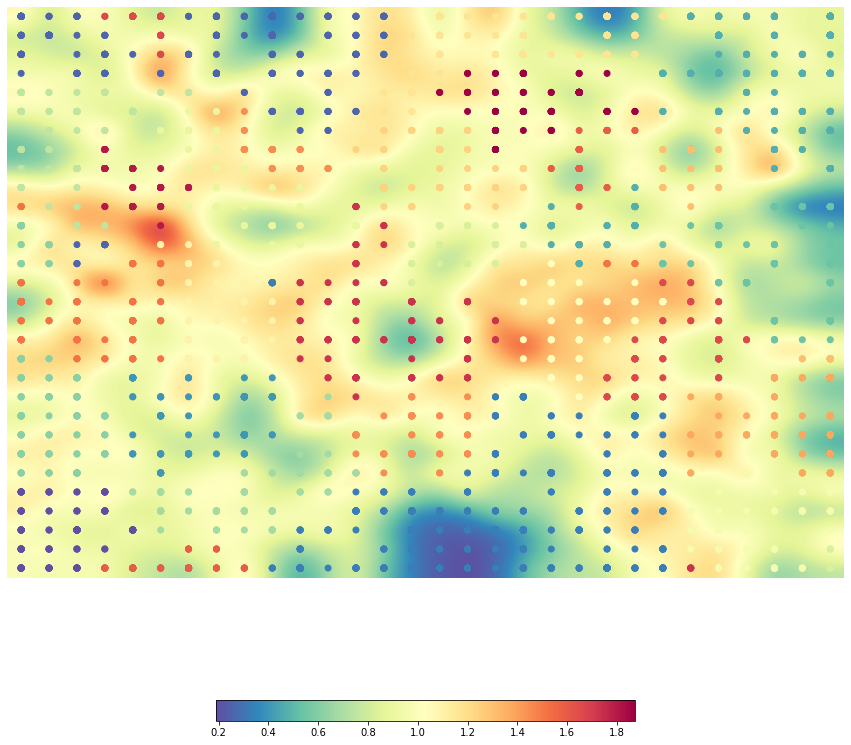

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [56]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [57]:
#Clusters
clusters=som.clusters

print("Clusters sorted by increasing number of neurons: \nCluster index \nNumber of neurons")
print(indices_of_number_of_neurons)
print(number_of_neurons_in_each_cluster)
uclusters, cluster_counts = np.unique(clusters, return_counts=True)
print("Clusters:", clusters, sep='\n')
print("Number of neurons in each cluster:", cluster_counts, sep='\n')
cluster_indices = np.argsort(cluster_counts)
sorted_counts = [cluster_counts[idx] for idx in cluster_indices]
pairs = np.array([cluster_indices, sorted_counts])
print("Cluster number, number of neurons in that cluster:")
print(pairs)

Clusters sorted by increasing number of neurons: 
Cluster index 
Number of neurons
[ 0  1  2  3  4  5  6  7  8  9 10 13 12 11 14 15 16 17 18 19 20 21 22 23
 24]
[ 14  18  20  20  24  25  26  27  29  29  31  32  32  32  33  33  33  35
  36  36  44  53  65  68 105]
Clusters:
[[ 1  1  1 21 21 21  1  1  1  1  1  1  1  1 14 14 14 14 14 14 14 14 14 14
   4  4  4  4  4  4]
 [ 1  1  1  1 21 21  1  1  1  1  1  1  1  1 14 14 14 14 14 14 14 14 14 14
   4  4  4  4  4  4]
 [ 1  1  1  1  1 21  1  1  1  1  1  1  1  1 14 14 14 14 14 14 14 14 14  4
   4  4  4  4  4  4]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1 14 14 14 24 24 24 24 24 24  4  4
   4  4  4  4  4  4]
 [ 8  8  8  8  8  8  8  1  1  1  1  1  1 14 14 24 24 24 24 24 24 24 24  4
   4  4  4  4  4  4]
 [ 8  8  8  8  8 10 10 10 18  1  1  1  1 14 14 15 24 24 24 24 24 24 24  4
   4  4  4  4  4  4]
 [ 8  8  8  8 10 10 10 10 18 18  1  1  1 15 15 15 15 24 24 24 20 20 20 16
  16 16  4  4  4  4]
 [ 8  8  8 23 23 10 10 10 18 18 18 18 15 15 15 15 15 24 15 20

## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης με το tf-idf και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

In [58]:
def print_categories_stats(movies): #movies is a list of movie-ID’s
    cluster_categories = []
    for i in movies:
        temp = categories[i][0].split(",")
        #categories[ID] is list with 1 string inside. temp is list of strings
        for c in temp:
            c = c.strip()
            cluster_categories.append(c)
        
    u_cluster_categories, counts = np.unique(cluster_categories, return_counts=True)
    ar = list(zip(u_cluster_categories, counts))
    sorted_ar = sorted(ar, key=lambda tup: tup[1], reverse=True)
    print("Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster")
    print(sorted_ar)

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

In [59]:
def where_is_same(a,b):
    return np.where(np.all(a==b,axis=1))[0]

In [60]:
def print_cluster_neurons_movies_report(cluster):
    cluster_bmus = np.column_stack(np.where(som.clusters==cluster)[::-1])
    li = [indices[where_is_same(bmu,bmus)] for bmu in cluster_bmus if bmu in bmus]
    li = [ind[0] for ind in li if len(ind)]
    return cluster_bmus

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

In [61]:
def neuron_movies_report(neurons):
    id_list = []
    index = [where_is_same(som.bmus,neuron) for neuron in neurons]
    index = [list(i) for i in index if len(i)]
    for i in index: id_list += i
    return id_list

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

In [62]:
K=25
for x in range(K):
  print("Cluster"," ",x)
  cluster_neurons = print_cluster_neurons_movies_report(x)
  id_list = neuron_movies_report(cluster_neurons)
  print_categories_stats(id_list)
  print("\n")

Cluster   0
Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Thriller"', 139), ('"Crime Thriller"', 125), ('"Crime Fiction"', 92), ('"Mystery"', 91), ('"Drama"', 79), ('"Suspense"', 42), ('"Psychological thriller"', 39), ('"Action"', 18), ('"Black-and-white"', 17), ('"Indie"', 17), ('"World cinema"', 17), ('"Horror"', 16), ('"Action/Adventure"', 15), ('"Detective"', 14), ('"Film noir"', 14), ('"Detective fiction"', 12), ('"Film adaptation"', 12), ('"Gangster Film"', 11), ('"Comedy"', 10), ('"Crime Drama"', 9), ('"Political thriller"', 9), ('"Romance Film"', 8), ('"Period piece"', 7), ('"Erotic thriller"', 5), ('"Political drama"', 5), ('"Spy"', 5), ('"Television movie"', 5), ('"Japanese Movies"', 4), ('"Romantic drama"', 4), ('"Whodunit"', 4), ('"Courtroom Drama"', 3), ('"Slasher"', 3), ('"Supernatural"', 3), ('"Adventure"', 2), ('"Black comedy"', 2), ('"Comedy Thriller"', 2), ('"Heist"', 2), ('"Teen"', 2), ('"War film"', 2), ('"Art film"', 1), ('"Biopic [feature]"', 1),

In [63]:
print_categories_stats(range(5000))

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Drama"', 2301), ('"Comedy"', 1230), ('"Romance Film"', 795), ('"Thriller"', 734), ('"Action"', 709), ('"World cinema"', 591), ('"Crime Fiction"', 532), ('"Horror"', 477), ('"Black-and-white"', 472), ('"Action/Adventure"', 453), ('"Indie"', 408), ('"Short Film"', 399), ('"Adventure"', 391), ('"Family Film"', 377), ('"Romantic drama"', 298), ('"Musical"', 295), ('"Animation"', 287), ('"Science Fiction"', 277), ('"Mystery"', 248), ('"Romantic comedy"', 245), ('"Fantasy"', 238), ('"Comedy film"', 215), ('"Crime Thriller"', 194), ('"War film"', 187), ('"Period piece"', 162), ('"Japanese Movies"', 160), ('"Silent film"', 148), ('"Bollywood"', 146), ('"Documentary"', 145), ('"Film adaptation"', 141), ('"Comedy-drama"', 135), ('"Psychological thriller"', 124), ('"Western"', 124), ('"Chinese Movies"', 114), ('"Children\'s/Family"', 107), ('"Television movie"', 100), ('"Teen"', 98), ('"Black comedy"', 86), ('"Suspense"', 84), ('"Com

-Παρατηρούμε ότι οι κατηγορίες με τη μεγαλύτερη συχνότητα εμφάνισης είναι η Drama(2301), Comedy(1230), Romance Film(795) και Thriller(734) και μερικές από τις πιο ασυνήθιστες είναι  Vampire(1) και Travel(1).

Βλέπουμε πως το 9ο cluster συγκεντρώνει κυρίως ταινιες του bollywood, musical και world cinema με τις υπόλοιπες κατηγορίες να είναι αρκετά σπανιότερες.

In [64]:
cluster = 9
cluster_neurons = print_cluster_neurons_movies_report(cluster)
id_list = neuron_movies_report(cluster_neurons)
print_categories_stats(id_list)



Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Bollywood"', 95), ('"Musical"', 92), ('"World cinema"', 92), ('"Drama"', 69), ('"Romance Film"', 38), ('"Romantic drama"', 33), ('"Comedy"', 15), ('"Thriller"', 14), ('"Action/Adventure"', 6), ('"Art film"', 6), ('"Action"', 5), ('"Crime Fiction"', 2), ('"Crime Thriller"', 2), ('"Family Film"', 2), ('"Political drama"', 2), ('"Adventure Comedy"', 1), ('"Animation"', 1), ('"Black-and-white"', 1), ('"Comedy-drama"', 1), ('"Family Drama"', 1), ('"Fantasy"', 1), ('"Gangster Film"', 1), ('"Horror"', 1), ('"Indie"', 1), ('"Medical fiction"', 1), ('"Melodrama"', 1), ('"Musical Drama"', 1), ('"Political thriller"', 1), ('"Road movie"', 1), ('"Romantic comedy"', 1), ('"Satire"', 1), ('"Superhero movie"', 1)]


## Tips για το SOM και το clustering

- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.

## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook (η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας).

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 


1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.

In [65]:
def categories_in_neuron(neuron):
    ID_list = neuron_movies_report([neuron])
    total_categories = []
    for i in ID_list:
        cat = [category.strip(" ").strip('"') for category in categories[i][0].split(",")]
        total_categories.extend(cat)
    result = np.unique(total_categories)
    sorted_counts_a = np.argsort(sorted_counts)
    return result

categories_in_neurons = np.asarray([categories_in_neuron(i) for i in range(20)])

def number_of_neurons_in_category(category):
    i=0
    for c in categories_in_neurons:
        if category in c: i+=1
    return i

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [66]:
# list of all categories 
distinct_categories=[]
for i in range(5000):
    cat = [category.strip(" ").strip('"') for category in categories[i][0].split(",")]
    distinct_categories.extend(cat)
distinct_categories=np.asarray(distinct_categories)
distinct_categories=np.unique(distinct_categories)


# all categories and their number of neurons 
ncategories=[]
for c in distinct_categories:
    k=number_of_neurons_in_category(c)
    ncategories.append([c,k])

ncategories=np.asarray(ncategories)
sorted_indices = np.argsort(ncategories[:,1])
ncategories = ncategories[sorted_indices]
print("Most popular categories and their number of neurons:\n", ncategories[::-1][:5])
print("\nLeast popular categories and their number of neurons:\n", ncategories[::-1][-5:])

Most popular categories and their number of neurons:
 [['Black-and-white' '7']
 ['Indie' '4']
 ['Romance Film' '4']
 ['World cinema' '3']
 ['Teen' '3']]

Least popular categories and their number of neurons:
 [['Libraries and librarians' '0']
 ['Legal drama' '0']
 ['Law & Crime' '0']
 ['Language & Literature' '0']
 ['Hagiography' '0']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


Είναι εμφανές πως οι περισσότερο συχνές και οικείες κατηγορίες έχουν αντιστοιχηθεί σε μεγαλύτερο αριθμό νευρώνων.

2. *Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.*

In [67]:
cluster = 16
cluster_neurons = print_cluster_neurons_movies_report(cluster)
id_list = neuron_movies_report(cluster_neurons)
print_categories_stats(id_list)

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Comedy film"', 89), ('"Romance Film"', 18), ('"Action"', 7), ('"Crime Fiction"', 6), ('"Adventure"', 5), ('"Fantasy"', 5), ('"Musical"', 5), ('"Science Fiction"', 4), ('"Animation"', 3), ('"Family Film"', 2), ('"Romantic comedy"', 2), ('"War film"', 2), ('"Western"', 2), ('"Black comedy"', 1), ('"Children\'s/Family"', 1), ('"Christmas movie"', 1), ('"Comedy"', 1), ('"Music"', 1), ('"Sports"', 1), ('"Teen"', 1), ('"Television movie"', 1)]


In [68]:
cluster = 9
cluster_neurons = print_cluster_neurons_movies_report(cluster)
id_list = neuron_movies_report(cluster_neurons)
print_categories_stats(id_list)

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Bollywood"', 95), ('"Musical"', 92), ('"World cinema"', 92), ('"Drama"', 69), ('"Romance Film"', 38), ('"Romantic drama"', 33), ('"Comedy"', 15), ('"Thriller"', 14), ('"Action/Adventure"', 6), ('"Art film"', 6), ('"Action"', 5), ('"Crime Fiction"', 2), ('"Crime Thriller"', 2), ('"Family Film"', 2), ('"Political drama"', 2), ('"Adventure Comedy"', 1), ('"Animation"', 1), ('"Black-and-white"', 1), ('"Comedy-drama"', 1), ('"Family Drama"', 1), ('"Fantasy"', 1), ('"Gangster Film"', 1), ('"Horror"', 1), ('"Indie"', 1), ('"Medical fiction"', 1), ('"Melodrama"', 1), ('"Musical Drama"', 1), ('"Political thriller"', 1), ('"Road movie"', 1), ('"Romantic comedy"', 1), ('"Satire"', 1), ('"Superhero movie"', 1)]


Παρατηρούμε ότι πρότυπα εισόδου που είναι σημασιολογικά μακρινά μεταξύ τους, για παράδειγμα ταινία κατηγορίας Horror και ταινία κατηγορίας Family Movie εμφανίζονται σε κόκκινα σημεία στο χάρτη με την έννοια ότι έχουν μεγάλη απόσταση μεταξύ τους.Πιο συγκεκριμενα βλέπουμε πως για τα δύο μακρινά clusters 9, 16 , το είδος των ταινιών που αντιπροσωπεύεται διαφέρει σημαντικά (comedy και bolywood movies).

3. *Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.*

In [69]:
cluster = 7
cluster_neurons = print_cluster_neurons_movies_report(cluster)
id_list = neuron_movies_report(cluster_neurons)
print_categories_stats(id_list)

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Crime Fiction"', 131), ('"Drama"', 124), ('"Thriller"', 45), ('"Black-and-white"', 39), ('"Film noir"', 38), ('"Crime Thriller"', 19), ('"Crime Drama"', 12), ('"Mystery"', 12), ('"Gangster Film"', 9), ('"Melodrama"', 9), ('"Psychological thriller"', 7), ('"Indie"', 6), ('"Comedy film"', 5), ('"Romantic drama"', 5), ('"Suspense"', 5), ('"Television movie"', 5), ('"Film adaptation"', 4), ('"Sports"', 4), ('"Action"', 3), ('"Adventure"', 3), ('"Courtroom Drama"', 3), ('"Fantasy"', 3), ('"Horror"', 3), ('"Period piece"', 3), ('"Pre-Code"', 3), ('"Teen"', 3), ('"World cinema"', 3), ('"Action/Adventure"', 2), ('"Addiction Drama"', 2), ('"Caper story"', 2), ('"Comedy"', 2), ('"Coming of age"', 2), ('"Detective fiction"', 2), ('"Detective"', 2), ('"Family Drama"', 2), ('"Romance Film"', 2), ('"Short Film"', 2), ('"Art film"', 1), ('"Blaxploitation"', 1), ('"Boxing"', 1), ('"Costume drama"', 1), ('"Ensemble Film"', 1), ('"Erotic Dr

In [70]:
cluster = 0
cluster_neurons = print_cluster_neurons_movies_report(cluster)
id_list = neuron_movies_report(cluster_neurons)
print_categories_stats(id_list)

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Thriller"', 139), ('"Crime Thriller"', 125), ('"Crime Fiction"', 92), ('"Mystery"', 91), ('"Drama"', 79), ('"Suspense"', 42), ('"Psychological thriller"', 39), ('"Action"', 18), ('"Black-and-white"', 17), ('"Indie"', 17), ('"World cinema"', 17), ('"Horror"', 16), ('"Action/Adventure"', 15), ('"Detective"', 14), ('"Film noir"', 14), ('"Detective fiction"', 12), ('"Film adaptation"', 12), ('"Gangster Film"', 11), ('"Comedy"', 10), ('"Crime Drama"', 9), ('"Political thriller"', 9), ('"Romance Film"', 8), ('"Period piece"', 7), ('"Erotic thriller"', 5), ('"Political drama"', 5), ('"Spy"', 5), ('"Television movie"', 5), ('"Japanese Movies"', 4), ('"Romantic drama"', 4), ('"Whodunit"', 4), ('"Courtroom Drama"', 3), ('"Slasher"', 3), ('"Supernatural"', 3), ('"Adventure"', 2), ('"Black comedy"', 2), ('"Comedy Thriller"', 2), ('"Heist"', 2), ('"Teen"', 2), ('"War film"', 2), ('"Art film"', 1), ('"Biopic [feature]"', 1), ('"Buddy fi

Παρατηρούμε ότι πρότυπα εισόδου που είναι σημασιολογικά κοντά μεταξύ τους, για παράδειγμα τανίες Thriller και Drama εμφανίζονται σε μπλε σημεία στο χάρτη, αφού έχουν μικρή απόσταση μεταξύ τους. Για παράδειγμα στο δικό μας χάρτη τα Cluster 7 και 0, όπως φαίνεται στον παραπάνω πίνακα των clusters, βρίσκονται δίπλα δίπλα σε μπλέ-πράσινες περιοχές και ανήκουν σε πολύ ομοιες κατηγορίες.

-*Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.*

In [71]:
cluster = 6
cluster_neurons = print_cluster_neurons_movies_report(cluster)
id_list = neuron_movies_report(cluster_neurons)
print_categories_stats(id_list)

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Action/Adventure"', 204), ('"Action"', 201), ('"Thriller"', 144), ('"Crime Fiction"', 65), ('"Comedy"', 57), ('"Drama"', 46), ('"Action Thrillers"', 45), ('"Martial Arts Film"', 42), ('"World cinema"', 41), ('"Crime Thriller"', 31), ('"Chinese Movies"', 24), ('"Horror"', 19), ('"Adventure"', 17), ('"Science Fiction"', 17), ('"Disaster"', 12), ('"Gangster Film"', 12), ('"Indie"', 12), ('"Sports"', 12), ('"Heist"', 11), ('"Mystery"', 11), ('"Suspense"', 11), ('"Crime Comedy"', 9), ('"Action Comedy"', 8), ('"Fantasy"', 8), ('"Natural horror films"', 8), ('"Political thriller"', 8), ('"Television movie"', 8), ('"War film"', 8), ('"Buddy film"', 7), ('"Chase Movie"', 7), ('"Japanese Movies"', 7), ('"Black comedy"', 6), ('"Film adaptation"', 6), ('"Parody"', 6), ('"Spy"', 6), ('"Superhero movie"', 6), ('"Western"', 6), ('"Auto racing"', 5), ('"Blaxploitation"', 5), ('"Romance Film"', 5), ('"Slapstick"', 5), ('"Ensemble Film"', 4

In [75]:
cluster = 22
cluster_neurons = print_cluster_neurons_movies_report(cluster)
id_list = neuron_movies_report(cluster_neurons)
print_categories_stats(id_list)

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Drama"', 176), ('"World cinema"', 174), ('"Art film"', 29), ('"Crime Fiction"', 19), ('"Comedy"', 17), ('"War film"', 17), ('"Period piece"', 16), ('"Action/Adventure"', 15), ('"Bollywood"', 15), ('"Japanese Movies"', 15), ('"Political drama"', 15), ('"Thriller"', 13), ('"Adventure"', 10), ('"Family Drama"', 10), ('"Indie"', 10), ('"Black-and-white"', 9), ('"Biographical film"', 8), ('"Coming of age"', 8), ('"Childhood Drama"', 7), ('"Road movie"', 7), ('"Chinese Movies"', 6), ('"Biography"', 5), ('"Biopic [feature]"', 5), ('"History"', 5), ('"Black comedy"', 4), ('"Family Film"', 4), ('"Historical fiction"', 4), ('"Marriage Drama"', 4), ('"Satire"', 4), ('"Christian film"', 3), ('"Comedy-drama"', 3), ('"Costume drama"', 3), ('"Ensemble Film"', 3), ('"Epic"', 3), ('"Fantasy"', 3), ('"Filipino Movies"', 3), ('"Horror"', 3), ('"Music"', 3), ('"Mystery"', 3), ('"Slice of life story"', 3), ('"Social problem film"', 3), ('"Spor

Παραπάνω έχουμε ένα παράδειγμα cluster (6) κατηγοριών κυρίως action και thriller που δεν έχουν τόση σχέση με "Δράμα" ενώ βρίσκονται γειτονικά στον αντίστοιχο χάρτη cluster (22). Η ερμηνεία που δίνουμε για την τοπολογική τους συνάφεια είναι η δευτερεύουσα παρουσία ταινιών "Crime Fiction", "Comedy" και στα 2 cluster που γεφυρώνει το χάσμα τους. 

-*Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.*

In [77]:
cluster = 19
cluster_neurons = print_cluster_neurons_movies_report(cluster)
id_list = neuron_movies_report(cluster_neurons)
print_categories_stats(id_list)

Κατηγορίες με συχνότητα εμφάνισης της κάθε μιας στο cluster
[('"Action"', 171), ('"Adventure"', 65), ('"Science Fiction"', 51), ('"Fantasy"', 33), ('"Action/Adventure"', 29), ('"Animation"', 22), ('"Japanese Movies"', 22), ('"Comedy"', 21), ('"Anime"', 17), ('"Crime Fiction"', 15), ('"Thriller"', 14), ('"Family Film"', 12), ('"Martial Arts Film"', 11), ('"Black-and-white"', 10), ('"Indie"', 10), ('"World cinema"', 10), ('"Superhero movie"', 9), ('"Chinese Movies"', 7), ('"Romance Film"', 7), ('"Comedy film"', 6), ('"Fantasy Adventure"', 6), ('"Spy"', 6), ('"Sword and sorcery"', 5), ('"Bollywood"', 4), ('"Cult"', 4), ('"Horror"', 4), ('"Musical"', 4), ('"Mystery"', 4), ('"Sword and sorcery films"', 4), ('"Western"', 4), ('"Children\'s"', 3), ('"Children\'s/Family"', 3), ('"Costume drama"', 3), ('"Doomsday film"', 3), ('"Parody"', 3), ('"Satire"', 3), ('"Television movie"', 3), ('"Action Comedy"', 2), ('"Alien Film"', 2), ('"Auto racing"', 2), ('"Creature Film"', 2), ('"Drama"', 2), ('"D

Σύμφωνα με την ερώτηση 1, ένα ενδιαφέρον cluster για εμάς θα ήταν αυτό που αντιπροσωπεύει το "Action"και "Adventure". Συμφωνα με τον χαρτη των Clusters που εχουμε πιο πανω το cluster που αντιπροσωπευει καλυτερα αυτο το ειδος ταινιων ειναι το 19. Το οποιο εχει αρκετη τοπολογική συναφεια με τα γειτονικά του clusters αφου σχεδόν ολα εχουν κοινό το ειδος "Action" και εναλλασετε ο δευτερευον τους ρολος, πχ "Drama", "Comedy" κλπ. Στην δικια μας περιπτωση το δευτερευον ειδος του cluster 19 ειναι το "Adventure". Εκτιμούμε πως αυτό οφείλεται στην ιδιότητα του είδους να ειναι κύριο και να υπάγονται σε αυτό μικρότερες κατηγορίες όπως Drama, Thriller κλπ, κατηγορίες που είναι τοπολογικά κοντινές στα συγκεκριμένα clusters.